# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

#1. Restauração de imagens usando a Transformada Rápida de Fourier

 A Transformada Rápida de Fourier converte uma image do domínio do espaço para uma representação no domínio da frequência. 
 
 Faça uma análise das frequências obtidas para a [imagem](https://drive.google.com/file/d/1NHo1RJdoQfSmzD0dOkFQb8Ib2GBcQipT/view?usp=sharing) abaixo e, utilizando uma máscara apropriada, remova as frequências indesejadas para remover o ruído.


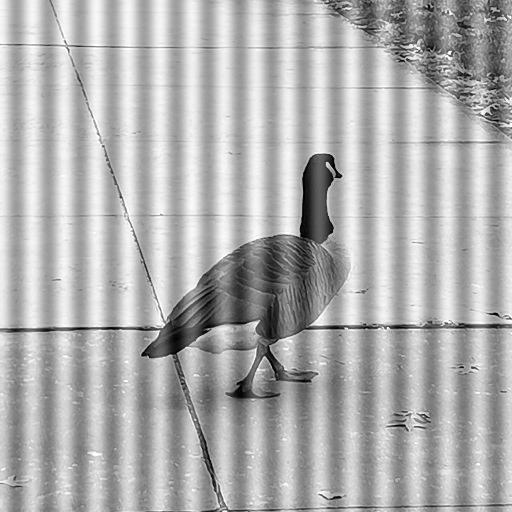



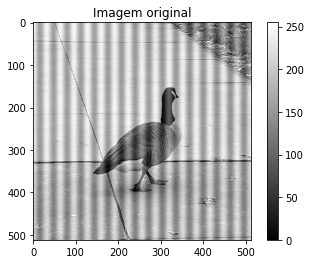

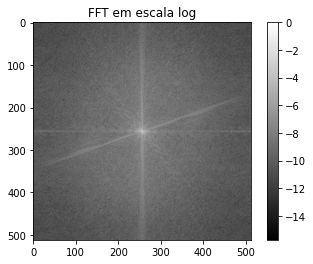

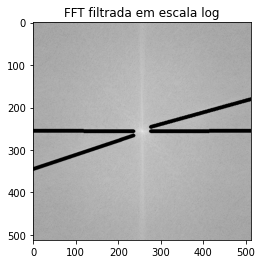

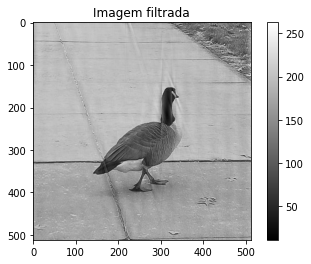

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack as fp


img = cv2.imread('/content/pnois1.jpeg', 0)



w, h = img.shape # w = h = 500

H = np.ones((w, h)) # filtro

mid = h//2
R = 250 #raio do circulo maior
r = 20 # distancia do centro

#cv2.circle(H,(h//2,w//2), R, 1, -1) # circulo mais externo (valores dentro do circulo sao iguais a 1)

# remove frequencias dentro do circulo
# as linhas desenhadas possuem dois pixels de largura
cv2.line(H,(mid-20,mid+10),(0,345), 0, 7)
cv2.line(H,(mid+20,mid-10),(550,170), 0, 7)

cv2.line(H,(mid-20,mid),(0,255), 0, 7)
cv2.line(H,(mid+20,mid),(550,255), 0, 7)

# colormap (escala de cinza)
cmap='gray'

plt.figure()
plt.title('Imagem original')
plt.imshow(img, cmap=cmap)
plt.colorbar()

H = fp.fftshift(H) #filtro passa-baixa
F = fp.fft2(img)

#tratando a FFT para os gráficos
Fm = np.absolute(F)
Fm /= Fm.max()
Fm = fp.fftshift(Fm)
Fm = np.log(Fm)

#mostrando a FFT em escala logaritmica
plt.figure()
plt.title('FFT em escala log')
plt.imshow(Fm, cmap=cmap)
plt.colorbar()

# aplicando o filtro
Fg = F*H
plt.figure()
plt.title('FFT filtrada em escala log')
Fga = np.absolute(Fg)
Fga = fp.fftshift(Fga)
Fga = np.log(Fga+1e-6)
plt.imshow(Fga, cmap=cmap)

# obtendo a transformada inversa, que é o sinal original (a imagem) filtrado
f_blurred = fp.ifft2(Fg)
f_blurred = np.absolute(f_blurred)

plt.figure()
plt.title('Imagem filtrada')
plt.imshow(f_blurred, cmap=cmap)
plt.colorbar()



#2. Erosão e Dilatação

Crie duas funções chamadas videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento semelhante para videoDilatacao(), porém fazendo o oposto da operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">clique aqui</a>.

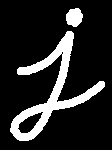

In [ ]:
# seu código aqui

Links para os vídeos:

#3. Detecção de linhas usando a Transformada de Hough

A Transformada de Hough é uma técnica que auxilia na detecção de formas geométricas em imagens digitais. 

Nesta aplicação, você deverá identificar as linhas que limitam uma via para que um carro autônomo possa seguir em tempo real. Devido a mudanças de iluminação, será necessário utilizar a transformada de Hough para conectar retas desconectadas. Utilize o seguinte [vídeo](https://drive.google.com/file/d/1G33NiG3rQuec-1hC-FshmjhLWiU1bGtO/view?usp=sharing) como entrada do algoritmo. O resultado de um frame deve ser como a imagem abaixo.

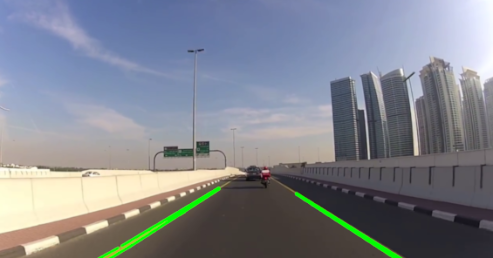

In [ ]:
# seu código aqui

#4. Segmentação de Imagens com K-Means

Quando falamos de segmentação de imagens, dizemos que vamos localizar segmentos das imagens. Um algoritmo que realiza essa tarefa é o K-Means.

No vídeo abaixo é apresentado como usar esse algoritmo para fazer quantização de imagens, ou seja, representar as cores originais em menos quantidades.

Dito isso, assista o vídeo abaixo e implemente um algoritmo que transforma qualquer imagem em um gráfico para jogo 8 bits. Assim, pegue uma imagem e gere ela novamente com apenas 256 cores usando o K-means.

<a href="https://www.youtube.com/watch?v=iHlve4t5z-0"><img src="https://img.youtube.com/vi/iHlve4t5z-0/mqdefault.jpg"/></a>

OBS: O algoritmo K-means é discutido em mais detalhes nos vídeos abaixo.

<a href="https://www.youtube.com/watch?v=2hsMErlQtcI"><img src="https://img.youtube.com/vi/2hsMErlQtcI/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=p2twwtegYkU"><img src="https://img.youtube.com/vi/p2twwtegYkU/mqdefault.jpg"/></a>

In [ ]:
# seu código aqui

#5. Segmentação usando o algoritmo GrabCut

Quando o assunto é obter o segmento exato que contém um objeto, o algoritmo GrabCut é excelente.

Nos vídeos abaixos há exemplos de sua implementação. 

<a href="https://www.youtube.com/watch?v=HBp6vQXFQgc"><img src="https://img.youtube.com/vi/HBp6vQXFQgc/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=DyRfAIQfVug"><img src="https://img.youtube.com/vi/DyRfAIQfVug/mqdefault.jpg"/></a>

Baseado nisso e nos conhecimentos anteriores, crie um algoritmo que segmente sua imagem e adicione por cima do fundo o efeito de borramento, usando um dos filtros explicados em lições passadas.

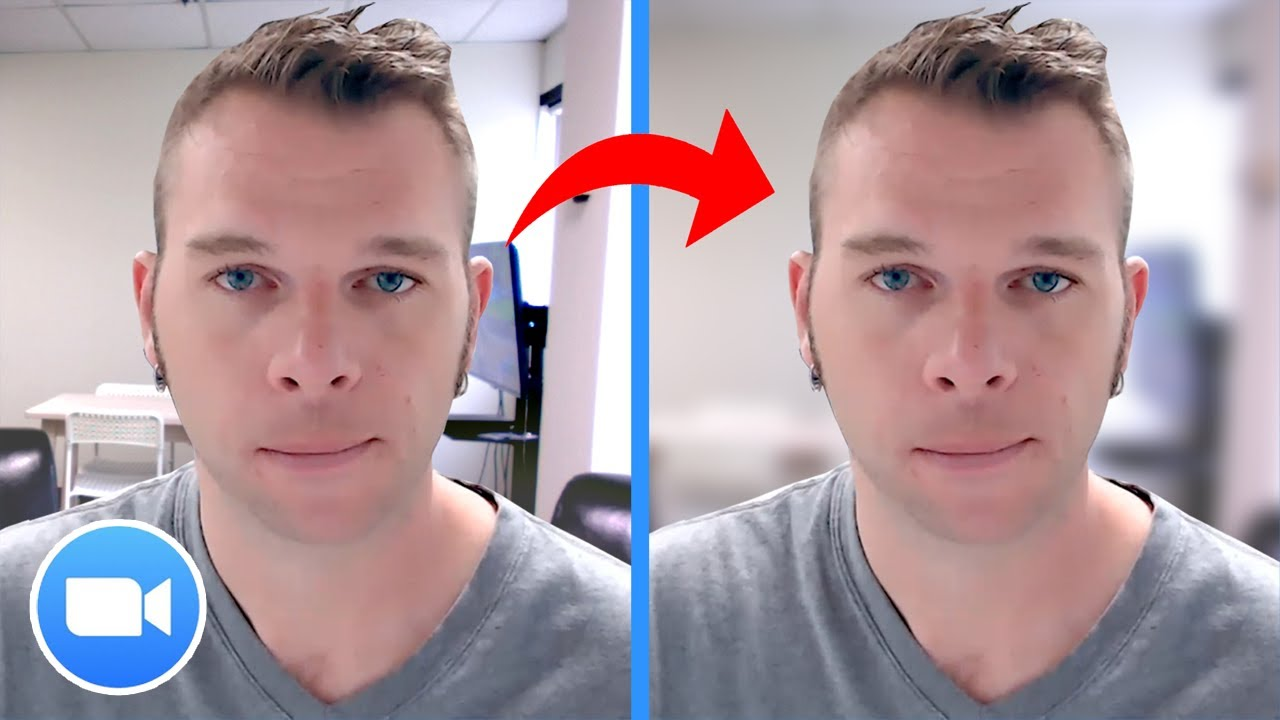

In [ ]:
# seu código aqui